# Project Description
For this project, we are given a dataset 'Cars.csv', which is a dataset containing sales of second-hand cars. The dataset contains information for brands, models, prices etc of second-hand cars.

For this project, we will first start by checking what is inside the dataset, and perform data manipulation and cleansing as necessary. After that we will proceed to exploratory data analysis, and subsequently build a linear regression model, which is aimed to predict the price of second-hand cars (target variable is 'Price'). Once the model is built, a simple demostration for model deployment will be provided.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

# Import the dataset

In [2]:
df = pd.read_csv('Cars.csv')

Check the content and descriptive statistics of the dataset:

In [3]:
df.head()

,Brand,Model,Body,Mileage,EngineV,Engine Type,Registration,Year,Price
0,BMW,320,sedan,277,2.0,Petrol,yes,1991,4200.0
1,Mercedes-Benz,Sprinter 212,van,427,2.9,Diesel,yes,1999,7900.0
2,Mercedes-Benz,S 500,sedan,358,5.0,Gas,yes,2003,13300.0
3,Audi,Q7,crossover,240,4.2,Petrol,yes,2007,23000.0
4,Toyota,Rav 4,crossover,120,2.0,Petrol,yes,2011,18300.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Model         4345 non-null   object 
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Price         4173 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mileage,4345.0,161.237284,105.705797,0.0,86.0,155.0,230.0,980.00
EngineV,4195.0,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Year,4345.0,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.00
Price,4173.0,19418.746935,25584.242620,600.0,6999.0,11500.0,21700.0,300000.00


# Dealing with missing data
Check if any missing data in the dataset:

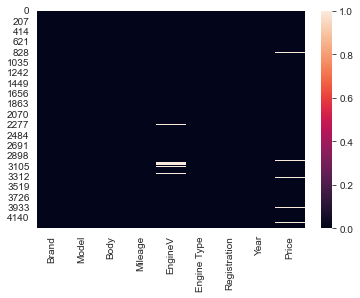

In [6]:
sns.heatmap(df.isna())
plt.show()

As shown above, there are some missing data in 'Price' and 'EngineV' columns.

Check the quantities of missing data in each column:

In [7]:
df.isna().sum()

Brand             0
Model             0
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Price           172
dtype: int64

Check the ratios of number of rows with missing data to total number of rows:

In [8]:
df.isna().sum() / len(df)

Brand           0.000000
Model           0.000000
Body            0.000000
Mileage         0.000000
EngineV         0.034522
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Price           0.039586
dtype: float64

Remove those rows for which there are missing data in 'Price' column (the target variable).

Note that this is not always recommended. However for the purpose of this project this should not cause major issue as we only remove less than 5% of the data.


In [9]:
df.dropna(subset = ['Price'], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Model         4173 non-null   object 
 2   Body          4173 non-null   object 
 3   Mileage       4173 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4173 non-null   object 
 6   Registration  4173 non-null   object 
 7   Year          4173 non-null   int64  
 8   Price         4173 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 326.0+ KB


In [11]:
df.isna().sum() / len(df)

Brand           0.000000
Model           0.000000
Body            0.000000
Mileage         0.000000
EngineV         0.035466
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Price           0.000000
dtype: float64

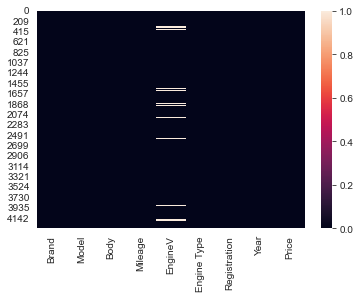

In [12]:
sns.heatmap(df.isna())
plt.show()

Now we have to deal with the missing data for EngineV column.

For this column we will fill in those missing data using the median engine volumn based on body type (imputation).

Median instead of mean value is used since median is less sensitive to outliers.

Body
crossover    3.0
hatch        1.6
other        2.2
sedan        2.2
vagon        2.0
van          2.0
Name: EngineV, dtype: float64

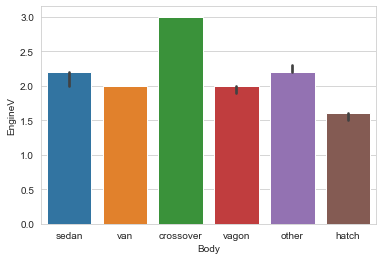

In [13]:
# EngineV vs Body
sns.barplot(x = 'Body', y = 'EngineV', data = df,estimator=np.median)
df.groupby('Body')['EngineV'].median()

In [14]:
# Define a function for the imputation
def impute_engine_v(cols):
    
    body = cols[0]
    engine_v = cols[1]
    
    if pd.isna(engine_v) == True:
        if body == 'crossover':
            return 3.0
        elif body == 'hatch':
            return 1.6
        elif body == 'other':
            return 2.2
        elif body == 'sedan':
            return 2.2
        elif body == 'vagon':
            return 2.0
        else:
            return 2.0
    else:
        return engine_v

Fill in those missing data in EngineV using the median engine volumn based on body type (imputation).

In [15]:
df['EngineV'] = df[['Body','EngineV']].apply(impute_engine_v,axis = 1)

Check the ratios of number of rows with missing data to total number of rows again:

In [16]:
df.isna().sum() / len(df)

Brand           0.0
Model           0.0
Body            0.0
Mileage         0.0
EngineV         0.0
Engine Type     0.0
Registration    0.0
Year            0.0
Price           0.0
dtype: float64

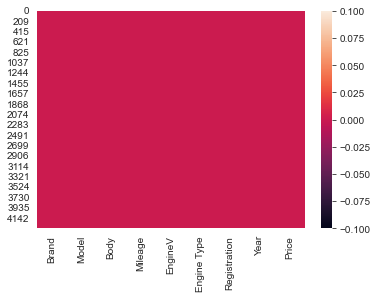

In [17]:
sns.heatmap(df.isna())
plt.show()

As shown above, there is no more missing data.

# Exploratory Data Analysis

Specify numerical columns:

In [18]:
numerical_cols = ['Price', 'Mileage', 'EngineV','Year']
numerical_cols

['Price', 'Mileage', 'EngineV', 'Year']

Specify categorical columns:

In [19]:
categorical_cols = ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
categorical_cols

['Brand', 'Body', 'Engine Type', 'Registration', 'Model']

Let's plot the histogram for each numerical column.

Define a function for plotting the histograms of numerical columns:

In [20]:
def plot_hist(df, cols):
    for col in cols:
        plt.figure(figsize=(10,6))
        sns.histplot(data = df, x = col,kde = True)
        plt.show()

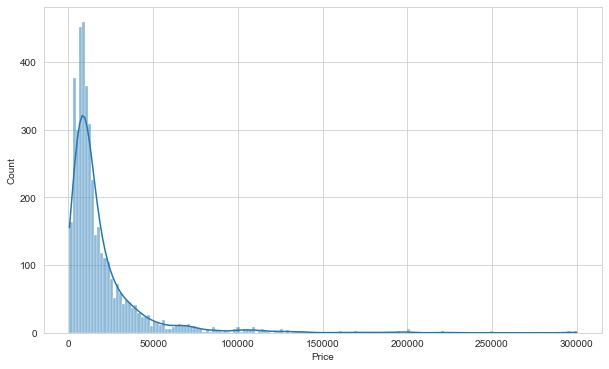

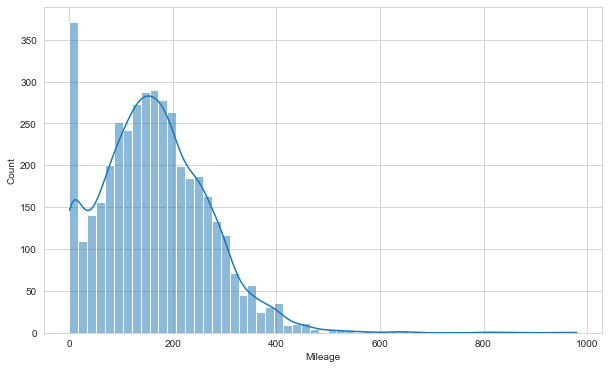

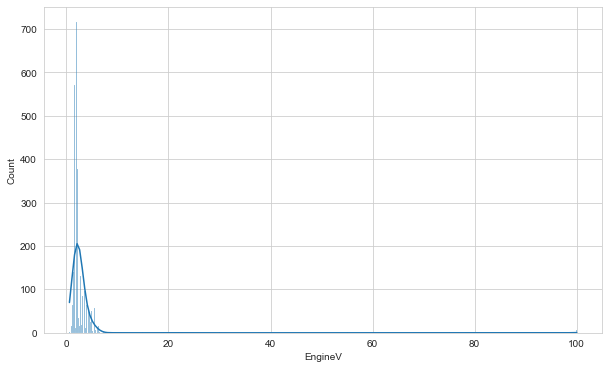

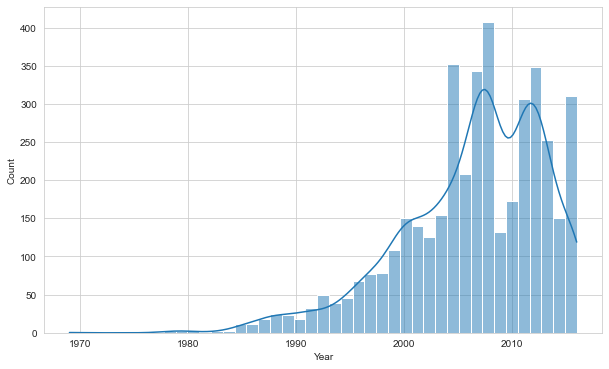

In [21]:
# Plot histograms of numerical columns
plot_hist(df,numerical_cols)

Let's plot the boxplot for each numerical column.

Define a function for plotting the boxplots of numerical columns:

In [22]:
def plot_box(df, cols):
    for col in cols:
        plt.figure(figsize=(10,6))
        sns.boxplot(data = df, y = col)
        plt.show()

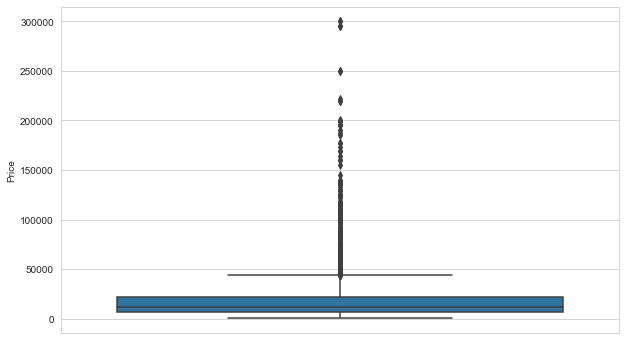

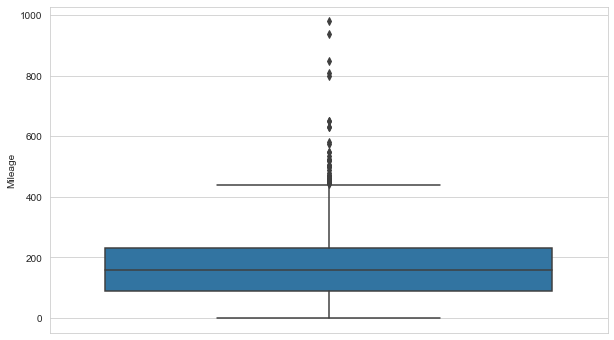

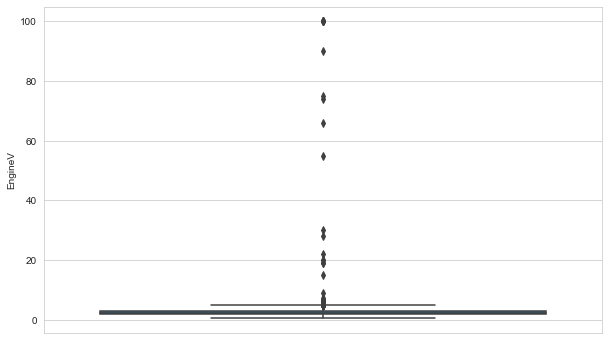

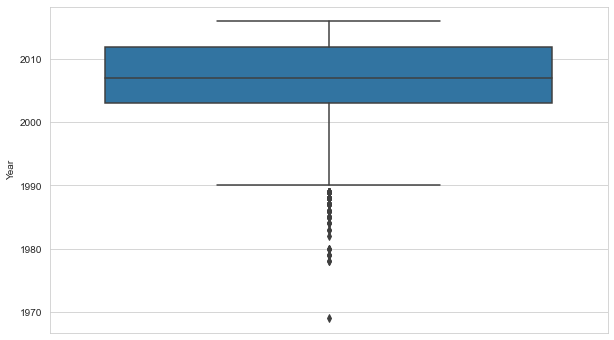

In [23]:
# Plot boxplots of numerical columns
plot_box(df, numerical_cols)

Let's plot the countplot for each categorical column.

Define a function for plotting the countplots of categorical columns:

In [24]:
def plot_count(df, cols):
    for col in cols:
        plt.figure(figsize=(10,6))
        sns.countplot(data = df, x = col)
        plt.show()

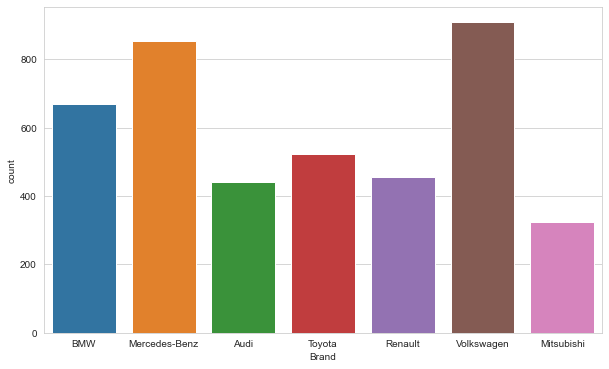

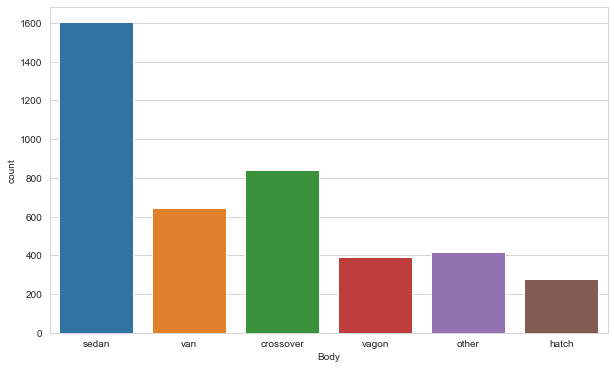

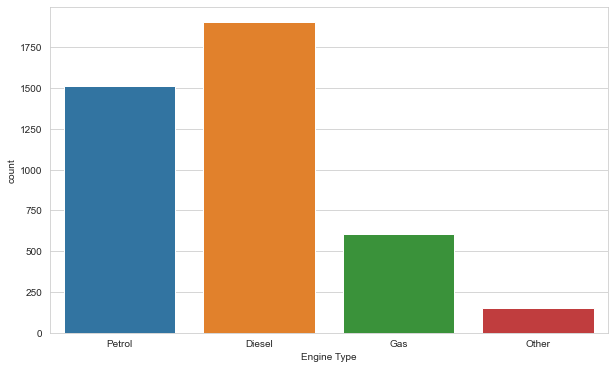

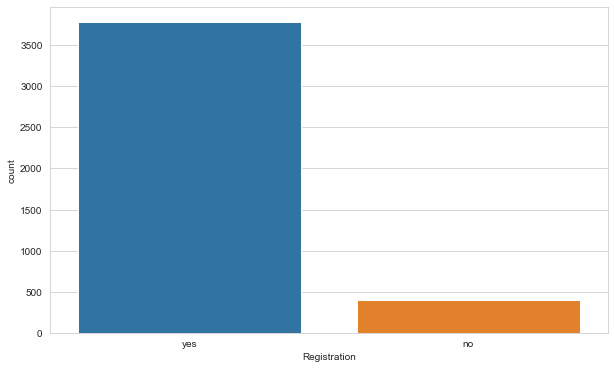

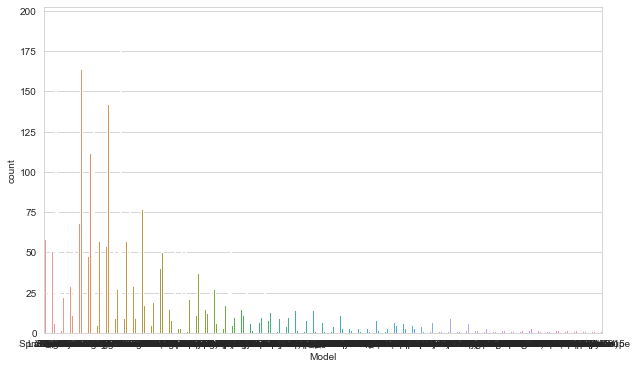

In [25]:
# Plot countplots of categorical columns
plot_count(df, categorical_cols)

Let's plot the pairplot for numerical columns.

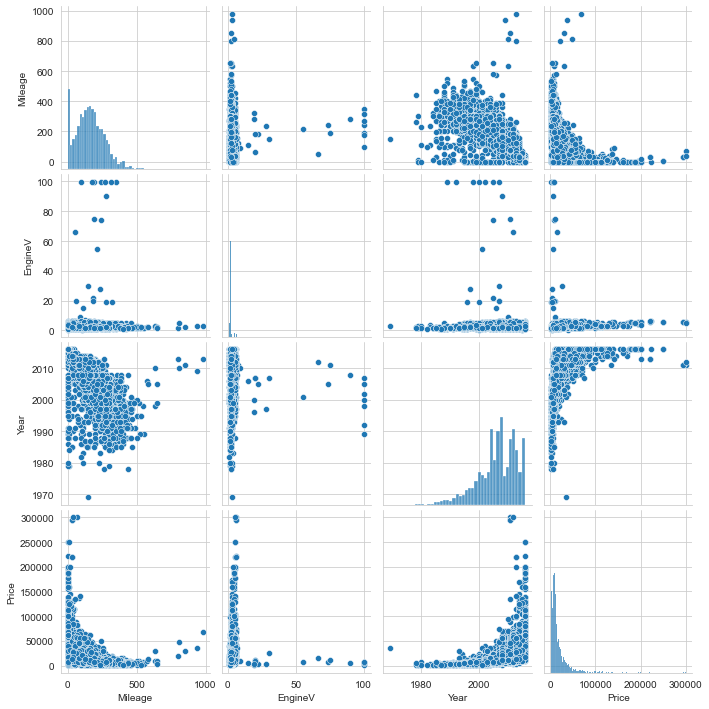

In [26]:
sns.pairplot(data = df)
plt.show()

Let's plot boxplots of 'Price' vs each categorical column.

Define a function for plotting the boxplots of 'Price' vs each categorical column.

In [27]:
def plot_box_pair(df, categorical_cols, numerical_col):
    for col in categorical_cols:
        plt.figure(figsize=(10,6))
        sns.boxplot(x = col, y = numerical_col, data = df)
        plt.show()

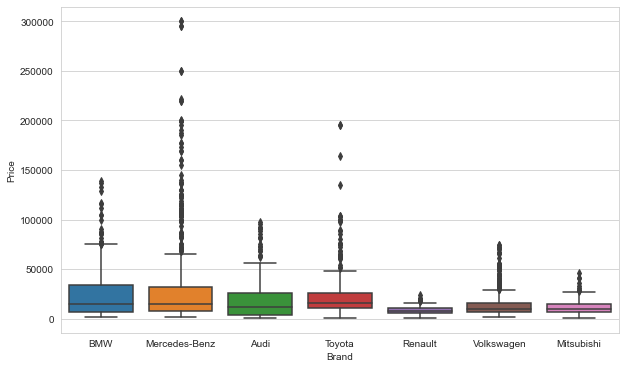

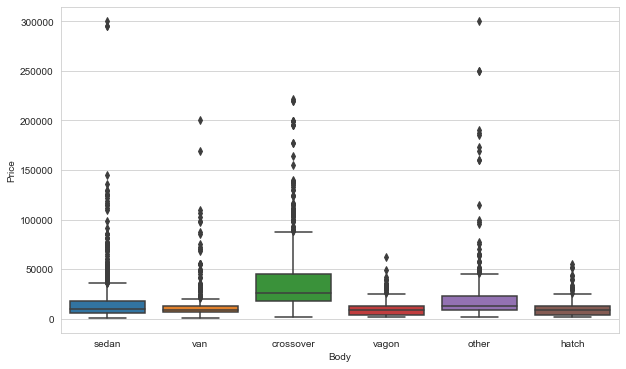

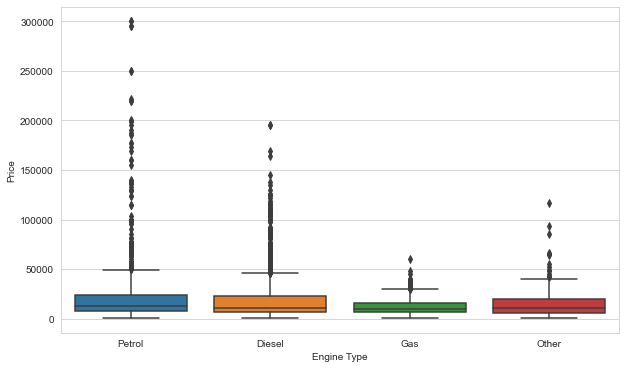

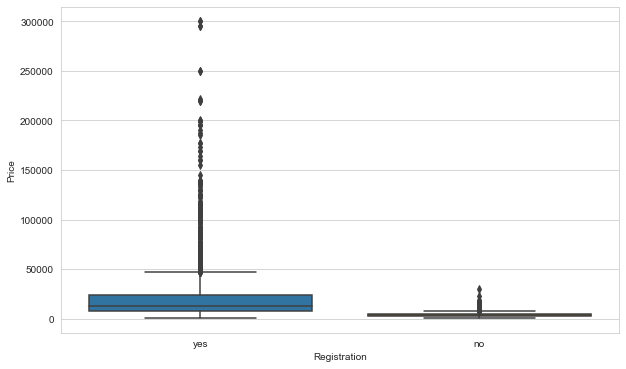

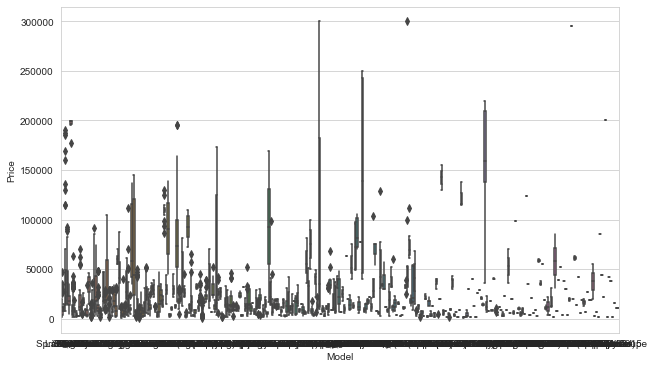

In [28]:
# Plot the boxplots of 'Price' vs each categorical column
plot_box_pair(df, categorical_cols, 'Price')

Some findings from the visualization above:
1. There are some extremely expensive used cars in the dataset (up to about $300,000) and those extremely expensive cars
   (outliers) can cause major issue for Ordinary Least Square. As such, we will remove those top 1% most expensive cars.
2. Following the same reason from point 1, we will also remove top 1% mileage.
3. Following the same reason from point 1, we will also remove bottom 1% year.
4. For the engine volume, it is found from internet (https://www.motortrend.com/features/top-10-largest-engines-in-u-s-market-      cars/) that the the largest engine volume for cars is about 8.4L. Those data for EngineV = 100L are clearly not correct. As      such, only those rows with engine volumn < 8.4L will be considered. Note that not all information are available in internet.    At these moments domain knowledge becomes critical when dealing with these situations.

# Data Cleansing

Determine the threshold for price:

In [29]:
# Specify the top percentage to remove
price_percent_to_remove = 1

# Calculate the (100 - percent_to_remove)th percentile of 'Price'
price_threshold = df['Price'].quantile(1 - (price_percent_to_remove/100))

Determine the threshold for mileage:

In [30]:
# Specify the top percentage to remove
mileage_percent_to_remove = 1

# Calculate the (100 - percent_to_remove)th percentile of 'Mileage'
mileage_threshold = df['Mileage'].quantile(1 - (mileage_percent_to_remove/100))

Determine the threshold for year:

In [31]:
# Specify the bottom percentage to remove
year_percent_to_remove = 1

# Calculate the (year_percent_to_remove)th percentile of 'Year'
year_threshold = df['Year'].quantile(year_percent_to_remove/100)

Determine the threshold for engine volumn:

In [32]:
# Specify the engine volume threshold
engine_v_threshold = 8.4

Keep only those rows within the thresholds:

In [33]:
# 1.'Price' less than price_threshold
# 2.'Mileage' less than mileage_threshold
# 3.'Year' larger than year_threshold
# 4.'EngineV' less than engine_v_threshold
df = df[(df['Price'] < price_threshold) &
        (df['Mileage'] < mileage_threshold) & 
        (df['Year'] > year_threshold) &
        (df['EngineV'] < engine_v_threshold)]

Since we have removed some rows, we have to reset the index of df. Otherwise there may be problematic when we try to fit the data to the linear regression model later.

In [34]:
df = df.reset_index(drop=True)

Check again all the visualization after data cleansing

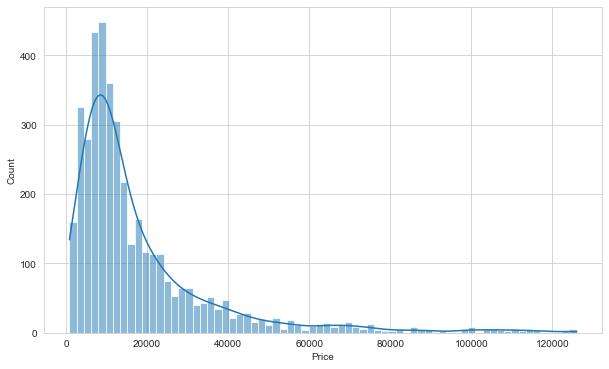

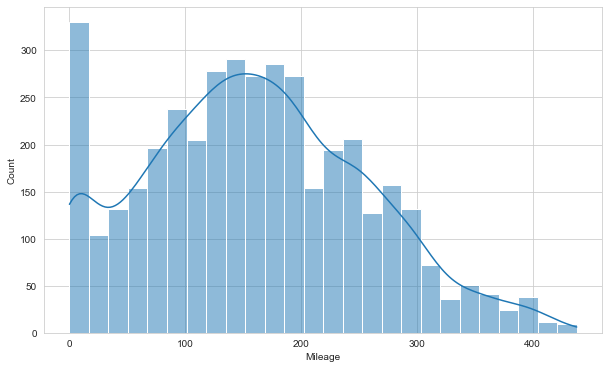

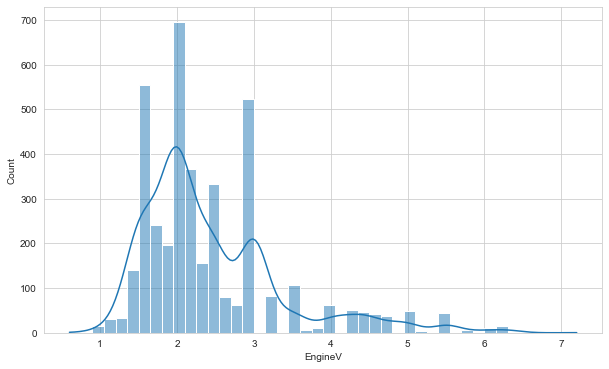

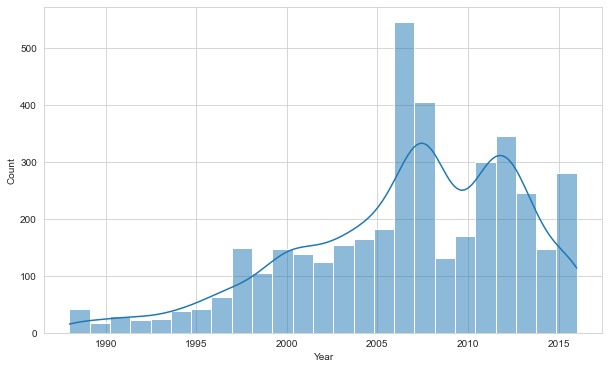

In [35]:
# Plot histograms of numerical columns
plot_hist(df,numerical_cols)

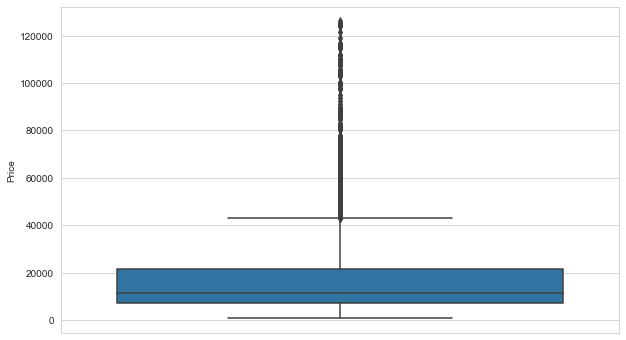

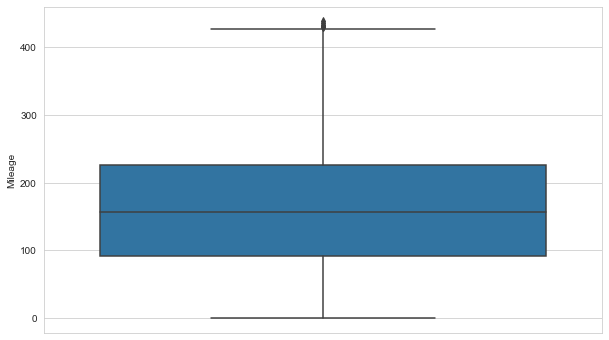

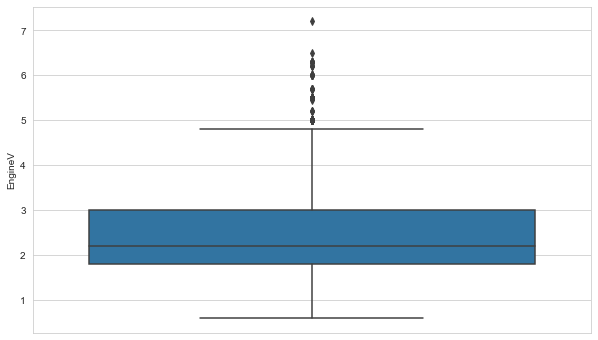

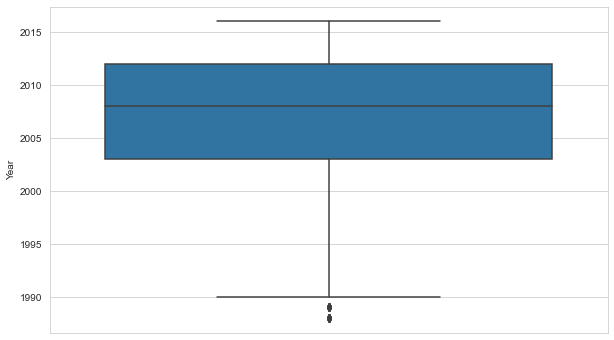

In [36]:
# Plot boxplots of numerical columns
plot_box(df, numerical_cols)

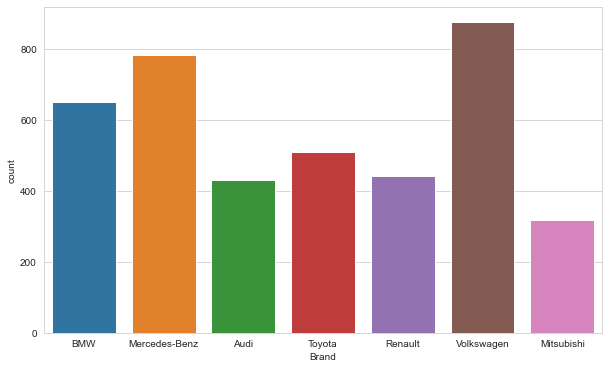

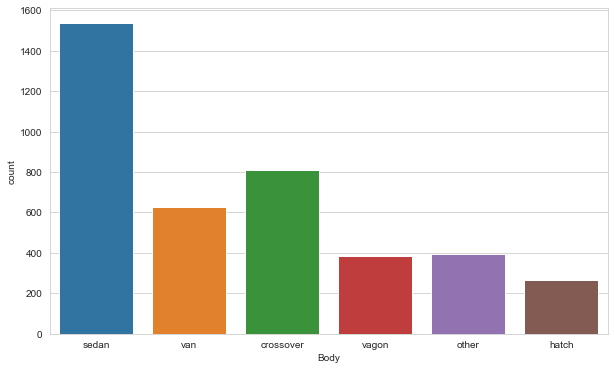

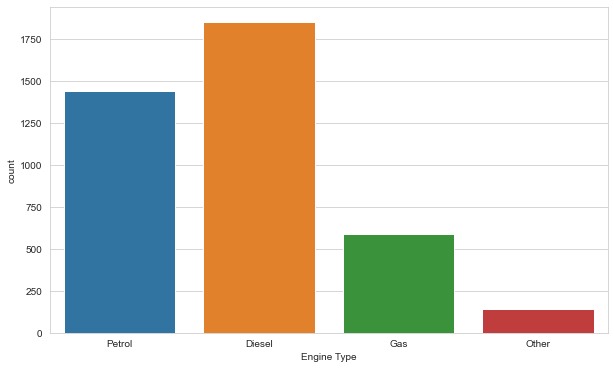

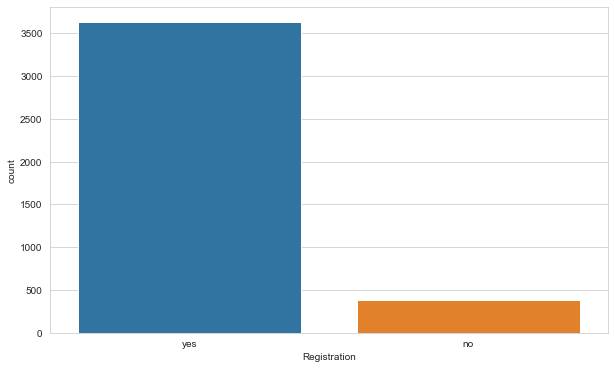

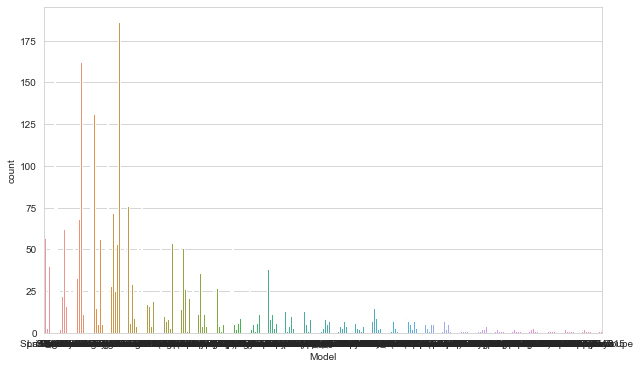

In [37]:
# Plot countplots of categorical columns
plot_count(df, categorical_cols)

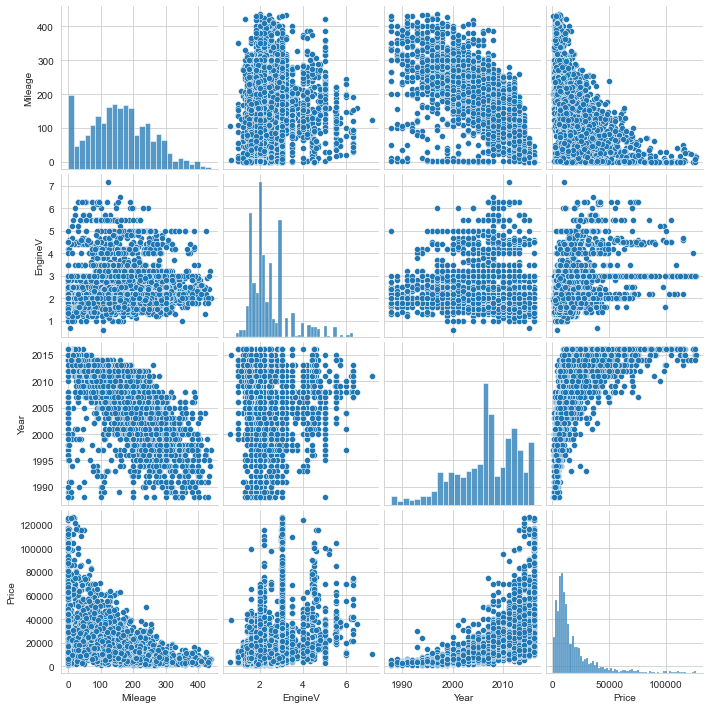

In [38]:
sns.pairplot(data = df)
plt.show()

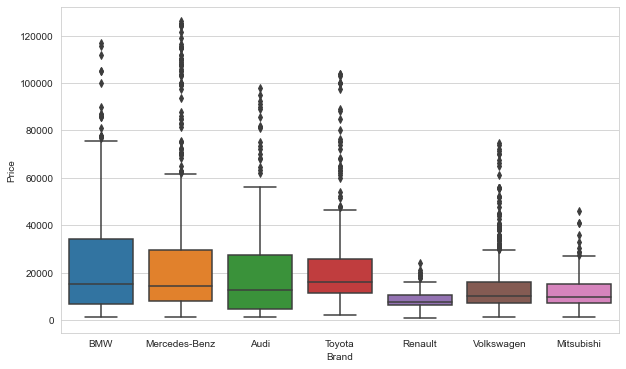

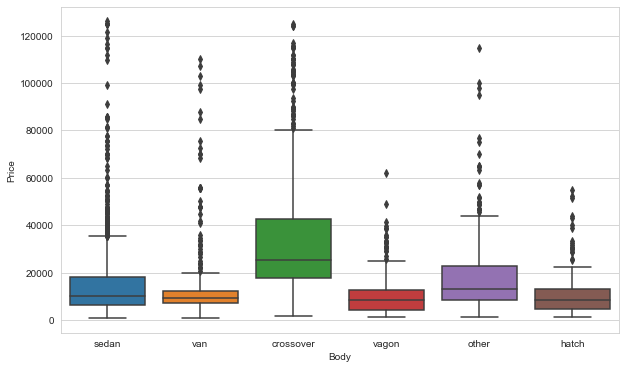

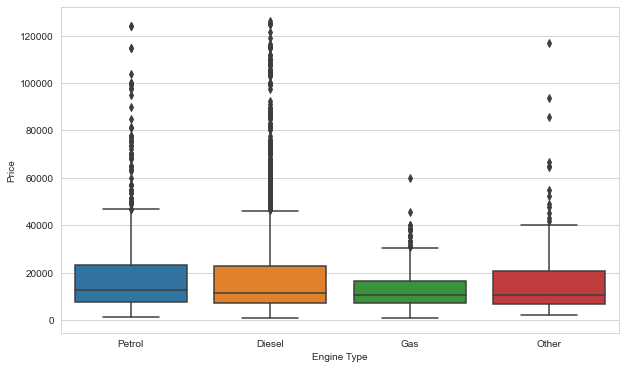

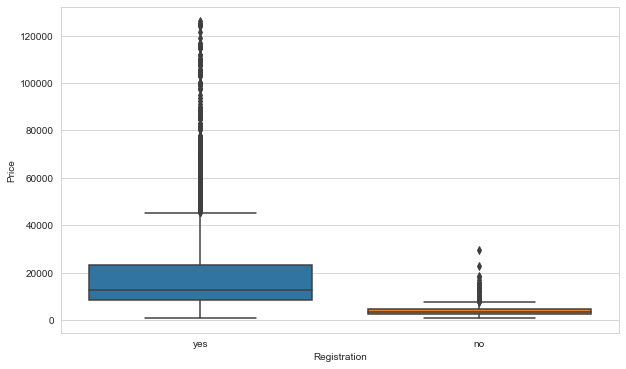

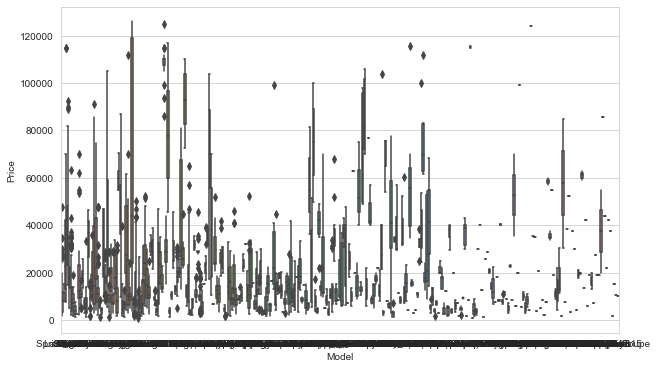

In [39]:
# Plot the boxplots of 'Price' vs each categorical column
plot_box_pair(df, categorical_cols, 'Price')

Check the content and descriptive statistics of the cleansed dataset:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4012 non-null   object 
 1   Model         4012 non-null   object 
 2   Body          4012 non-null   object 
 3   Mileage       4012 non-null   int64  
 4   EngineV       4012 non-null   float64
 5   Engine Type   4012 non-null   object 
 6   Registration  4012 non-null   object 
 7   Year          4012 non-null   int64  
 8   Price         4012 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 282.2+ KB


In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mileage,4012.0,160.690179,95.823840,0.0,91.0,157.0,226.0,438.0
EngineV,4012.0,2.443008,0.939496,0.6,1.8,2.2,3.0,7.2
Year,4012.0,2006.686441,6.109480,1988.0,2003.0,2008.0,2012.0,2016.0
Price,4012.0,18073.312340,18969.015392,800.0,7200.0,11525.0,21500.0,126000.0


Based on the above data cleansing and visualization, we can see that the distributions are not as extreme. Some further data manipulation may be beneficial. For the purpose of this project, we will proceed from here.

# Linear Regression and Its Assumptions

For this project, linear regression using ordinary least square (OLS) method for estimating coefficients of the linear equation will be used.

OLS regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable. The method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line. 

There are several assumptions need to be satisfied in order to use the OLS regression properly. These assumptions are:

1. Linear relationship:

    Linear relationship should exist between the dependent and the independent variables. If the true relationships between them are not linear, the model will not capture the trend of the dataset and will perform poorly for prediction. One simple way to check for linearity is to create scatter plots between the dependent and independent variables and check if any linear relationship. If no obvious linear relationship is observed, non-linear transformation such as logarithmic, exponential, square root or reciprocal can be applied to either the dependent or independent variables, or both.


2. No autocorrelation:

    No identifiable relationship should exist between the values of the error term, which means the residuals (error terms) are independent of each other. This can be checked using Durbin-Watson (DW) test:

    DW = 2 ==> No autocorrelation
        
    DW < 1 or DW > 3 ==> Alarm for autocorrelation


3. No multicollinearity:

    Multicollinearity is the phenomenon when a number of independent variables are strongly correlated (ie. two variables move in coordination with one another). This should be avoided as if the two independent variables are strongly correlated, they explain the same information. The model will not be able to know which of the two variables is actually responsible for a change in the dependent variable. Besides, if redundant variables are included in the model, the model will tend to overfit. Multicollinearity can be checked by using:

    i. Create the correlation matrix (good to be visualized using seaborn's heatmap plot)

    ii. Determine the Variance Inflation Factor (VIF):
        VIF <= 4 ==> No multicollinearity
        VIF >= 10 ==> Serious multicollinearity
    
    
4. Normality of residuals:

    The residuals should follow a normal distribution. This can be checked by:
    
    i. Create a histogram of residuals and check if it follows normal distribution
    
    ii. Create a Q-Q (Quantile-Quantile) plot. If the data points are on the graph following and 45-deg straight diagonal line (bottom left to upper right), the assumption is met.


5. Homoscedasticity:

    Homoscedasticity means the residuals have constant variance at every level of x. The absence of this phenomenon is known as heteroscedasticity. Heteroscedasticity generally arises in the presence of outliers and extreme values.
    Homoscedasticity can be checked by creating a scatter plot that shows residual vs fitted value. If the data points are spread across equally without a prominent pattern, it means the residuals have constant variance (homoscedasticity). Otherwise, if a funnel-shaped pattern is seen, it means the residuals are not distributed equally and depicts a non-constant variance (heteroscedasticity).


6. All independent variables are uncorrelated with the error term:

    The independent variables should not be correlated with the error term. If this happens, it is likely that the model is a misspecified model (an important explanatory variable may have been forgotten from the model). This can be checked by plotting the scatter plots between residuals and independent variables.

# Verifying OLS Assumptions

Checking for Linear Relationships:

Let's plot the scatter plots of the dependent variable ('Price') vs each numerical, independent variable ('Mileage', 'EngineV', 'Year').

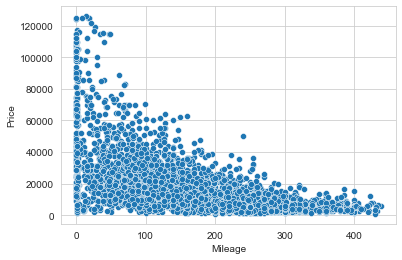

In [42]:
sns.scatterplot(x = 'Mileage', y = 'Price', data = df)
plt.show()

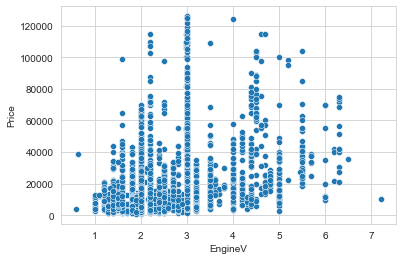

In [43]:
sns.scatterplot(x = 'EngineV', y = 'Price', data = df)
plt.show()

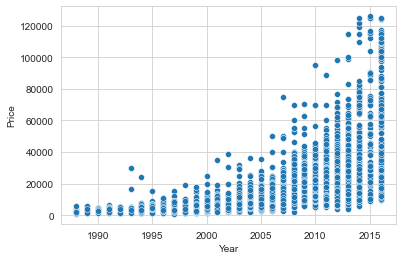

In [44]:
sns.scatterplot(x = 'Year', y = 'Price', data = df)
plt.show()

From visualization above the linear relationships are not so obvious.

From here, we will try to transform the 'Price' with log transformation and add the new column into df.

In [45]:
df['log_price'] = np.log(df['Price'])

In [46]:
df.head()

,Brand,Model,Body,Mileage,EngineV,Engine Type,Registration,Year,Price,log_price
0,BMW,320,sedan,277,2.0,Petrol,yes,1991,4200.0,8.342840
1,Mercedes-Benz,Sprinter 212,van,427,2.9,Diesel,yes,1999,7900.0,8.974618
2,Mercedes-Benz,S 500,sedan,358,5.0,Gas,yes,2003,13300.0,9.495519
3,Audi,Q7,crossover,240,4.2,Petrol,yes,2007,23000.0,10.043249
4,Toyota,Rav 4,crossover,120,2.0,Petrol,yes,2011,18300.0,9.814656


Now, let's plot the scatter plots using the log-transformed price.

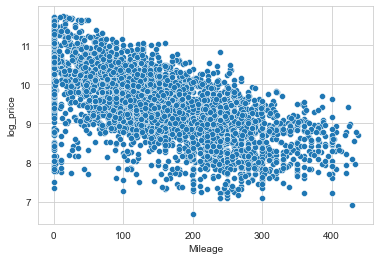

In [47]:
sns.scatterplot(x = 'Mileage', y = 'log_price', data = df)
plt.show()

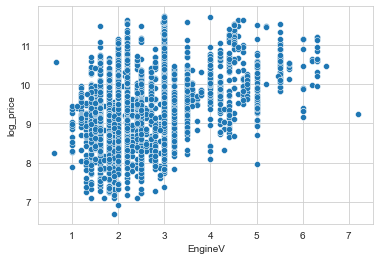

In [48]:
sns.scatterplot(x = 'EngineV', y = 'log_price', data = df)
plt.show()

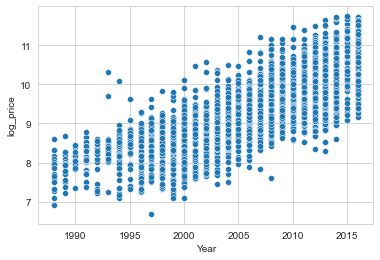

In [49]:
sns.scatterplot(x = 'Year', y = 'log_price', data = df)
plt.show()

From the visualization above, we can see more obvious linear relationships after using log-transformation and it is certainly an improvement compared to the previous ones without log-transformation.

Since we will only be using the 'log_price' column from now on, we can drop the old 'Price' column.

In [50]:
df.drop('Price',axis = 1, inplace = True)

In [51]:
df.head()

,Brand,Model,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,320,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,Sprinter 212,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,S 500,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,Q7,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,Rav 4,crossover,120,2.0,Petrol,yes,2011,9.814656


Checking for Multicollinearity:

Let's check the correlation matrix for numerical variables:

In [52]:
df.corr()

,Mileage,EngineV,Year,log_price
Mileage,1.000000,0.004131,-0.718932,-0.614697
EngineV,0.004131,1.000000,-0.017533,0.405534
Year,-0.718932,-0.017533,1.000000,0.746418
log_price,-0.614697,0.405534,0.746418,1.000000


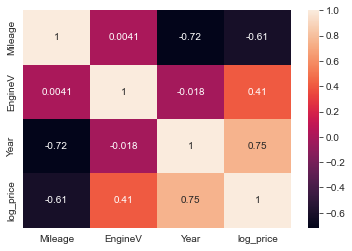

In [53]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [54]:
df[['Mileage', 'EngineV', 'Year']].corr()

,Mileage,EngineV,Year
Mileage,1.000000,0.004131,-0.718932
EngineV,0.004131,1.000000,-0.017533
Year,-0.718932,-0.017533,1.000000


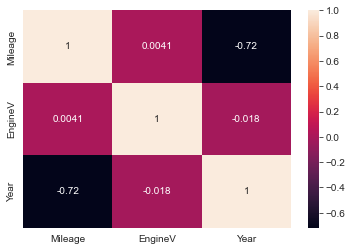

In [55]:
sns.heatmap(df[['Mileage', 'EngineV', 'Year']].corr(),annot=True)
plt.show()

From above we can see that 'Mileage' and 'Year' are correlated. 

Let's proceed to further study using VIF from statsmodels:

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

For simplicity, we declare a new variable to store all numerical features we want to check for multicollinearity:

In [57]:
num_variables = df[['Mileage', 'EngineV', 'Year']]

To report the result of VIF properly, we will store it in a pandas dataframe:

In [58]:
# Create an empty dataframe
vif = pd.DataFrame()

In [59]:
# Create a column 'Features' which shows the name of numerical variables
vif["Features"] = num_variables.columns

In [60]:
# Create a column 'VIF' which shows the calculated VIF of numerical variables
vif["VIF"] = [variance_inflation_factor(num_variables.values, i) for i in range(num_variables.shape[1])]

In [61]:
# Check the vif dataframe
vif

,Features,VIF
0,Mileage,3.785312
1,EngineV,7.761574
2,Year,10.460639


From above it is clear that 'Year' has serious multicollinearity (with 'Mileage') since its VIF is larger than 10.

However, since 'Year' is more correlated with 'log_price' compared to 'Mileage' (meaning 'Year' can explain 'log_price' better than 'Mileage'), 'Mileage' column will be dropped.

In [62]:
# Remove 'Mileage' column
df.drop('Mileage', axis = 1, inplace=True)

In [63]:
df.head()

,Brand,Model,Body,EngineV,Engine Type,Registration,Year,log_price
0,BMW,320,sedan,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,Sprinter 212,van,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,S 500,sedan,5.0,Gas,yes,2003,9.495519
3,Audi,Q7,crossover,4.2,Petrol,yes,2007,10.043249
4,Toyota,Rav 4,crossover,2.0,Petrol,yes,2011,9.814656


# Handling Categorical Variables

It should be noted that for the 'Model' column, there are 295 unique models. Due to this gigantic number, we will have serious problem if we try to create dummy variables out of it. Probably some models can be grouped together by using domain knowledge. For the purpose of this project, we will drop the 'Model' column for simplicity.

In [64]:
# Check the number of unique items from 'Model' column
df['Model'].nunique()

295

In [65]:
# Drop the 'Model' column
df.drop('Model', axis = 1, inplace=True)

In [66]:
# Check the head of df
df.head()

,Brand,Body,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,2.0,Petrol,yes,2011,9.814656


Dummy variables for categorical variable will be created in order to include them into the linear regression model. It shall be noted that one of the dummy columns shall be dropped to avoid perfect multicollinearity between the predictors. In addition, it should also be noted that whichever column is dropped, it will become the reference point and will have significant impact on how coefficients are interpreted.

We will use pandas get_dummies method for creating dummy variables. We will set drop_first = True to drop the first dummy column of each categorical column.

In [67]:
df = pd.get_dummies(data = df,drop_first=True)

In [68]:
df.head()

,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Notice that the following columns have been dropped and they have become the reference point of their respective categorical column:

    Brand_Audi
    Body_crossover
    Engine Type_Diesel
    Registration_no

# Feature Scaling

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Having features on a similar scale can help the gradient descent converge more quickly towards the minima and can help reduce computational cost.

In addition to above-mentioned algorithms, distance-based algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. Due to this reason, feature scaling is also required.

For this project, we will use standardization (Z-Score) for the feature scaling. StandardScaler from sklearn will be used for standardization.

In [69]:
# Not all numerical feature variables need scaling. 
# Columns for dummy variables and target variable are not to be scaled.

# Only 'Year' and 'EngineV' will be scaled
to_scale_cols = ['Year','EngineV']

In [70]:
# Import StandardScaler() from sklearn
from sklearn.preprocessing import StandardScaler

In [71]:
# Create a scaler object
scaler = StandardScaler()

In [72]:
df_to_scale = df[to_scale_cols]
df_to_scale.head()

,Year,EngineV
0,1991,2.0
1,1999,2.9
2,2003,5.0
3,2007,4.2
4,2011,2.0


In [73]:
df_not_to_scale = df.drop(to_scale_cols,axis = 1)
df_not_to_scale.head()

,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [74]:
# Fit df_to_scale to the scaler
scaler.fit(df_to_scale)

StandardScaler()

In [75]:
# Transform df_to_scale using the scaler
df_scaled_arr = scaler.transform(df_to_scale)
df_scaled_arr

array([[-2.56787767, -0.47159726],
       [-1.25827393,  0.48648268],
       [-0.60347206,  2.72200256],
       ...,
       [-1.25827393,  1.12520265],
       [ 1.19723308, -0.25869061],
       [ 1.03353261, -0.47159726]])

In [76]:
# Store the scaled data as dataframe
df_scaled = pd.DataFrame(data = df_scaled_arr, columns=df_to_scale.columns)
df_scaled.head()

,Year,EngineV
0,-2.567878,-0.471597
1,-1.258274,0.486483
2,-0.603472,2.722003
3,0.051330,1.870376
4,0.706132,-0.471597


In [77]:
# Combine the dataframe with df_not_to_scale
df_scaled = pd.concat([df_scaled, df_not_to_scale],axis = 1)
df_scaled.head()

,Year,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,-2.567878,-0.471597,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,-1.258274,0.486483,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,-0.603472,2.722003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.051330,1.870376,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.706132,-0.471597,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


From above, we have a cleaned and scaled dataframe, which is ready for the machine learning stage.

# Train-Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is an essential part of machine learning as if this the train-test split is not performed during model training, we are at risk of overfitting the model.

In [78]:
# Declare dependent (y) and independent variables (X)
X = df_scaled.drop('log_price',axis = 1)
y = df_scaled['log_price']

In [79]:
X.head()

,Year,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,-2.567878,-0.471597,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,-1.258274,0.486483,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,-0.603472,2.722003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.051330,1.870376,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.706132,-0.471597,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [80]:
y.head()

0     8.342840
1     8.974618
2     9.495519
3    10.043249
4     9.814656
Name: log_price, dtype: float64

In [81]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [82]:
# Use 20% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create the Linear Regression Model

In [83]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [84]:
# Create an object for linear regression
linear_model = LinearRegression()

In [85]:
# Fit the linear regression object with train data
linear_model.fit(X_train,y_train)

LinearRegression()

Visualize the linear model's predictions for train data:

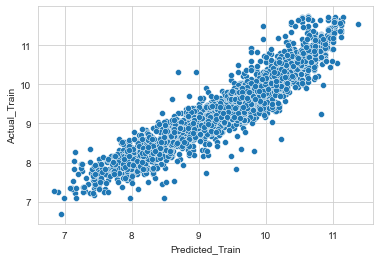

In [86]:
predictions_train = linear_model.predict(X_train)

sns.scatterplot(x = predictions_train, y = y_train)
plt.xlabel('Predicted_Train')
plt.ylabel('Actual_Train')
plt.show()

Visualize the linear model's residuals for train data:

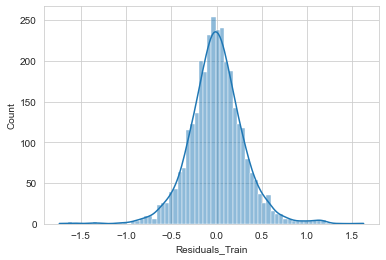

In [87]:
residuals_train = y_train - predictions_train

sns.histplot(x = residuals_train, kde=True)
plt.xlabel('Residuals_Train')
plt.show()

Visualize the linear model's predictions for test data:

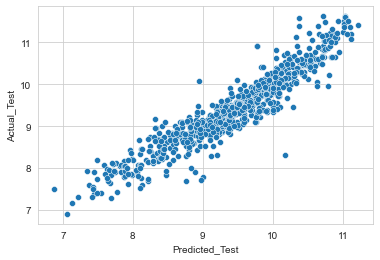

In [88]:
predictions_test = linear_model.predict(X_test)

sns.scatterplot(x = predictions_test, y = y_test)
plt.xlabel('Predicted_Test')
plt.ylabel('Actual_Test')
plt.show()

Visualize the linear model's residuals for test data:

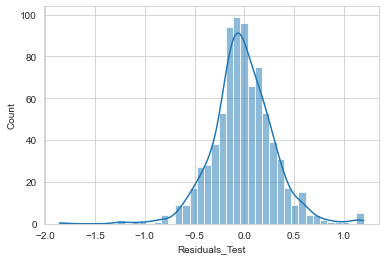

In [89]:
residuals_test = y_test - predictions_test

sns.histplot(x = residuals_test, kde=True)
plt.xlabel('Residuals_Test')
plt.show()

From the histograms for residuals above, we can see that they generally follow normal distribution. However, it should be noted that the tail on the left hand side are longer than the right hand side. This implies that for some predictions made by the linear model are higher than the actual values.

Check for Homoscedasticity:

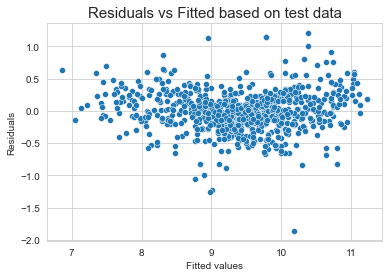

In [90]:
# Plot the scatter plot for residuals_test vs predictions_test
sns.scatterplot(x = predictions_test,y = residuals_test)

plt.title('Residuals vs Fitted based on test data', fontsize = 15)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

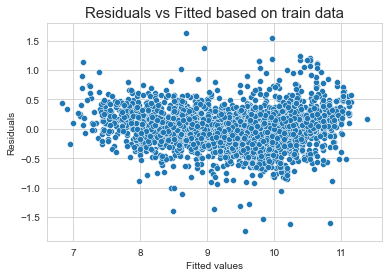

In [91]:
# Plot the scatter plot for residuals_train vs predictions_train
sns.scatterplot(x = predictions_train,y = residuals_train)

plt.title('Residuals vs Fitted based on train data', fontsize = 15)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

From the above, there is no obvious pattern observed as most of the points are almost uniformly distributed across fitted values.

Check if all independent variables are uncorrelated with the error term:

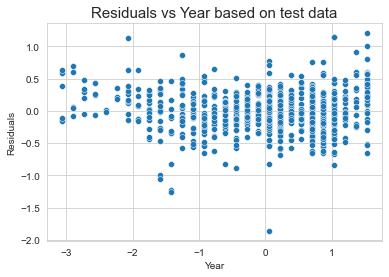

In [92]:
# Plot the scatter plot for Residuals vs Year based on test data
sns.scatterplot(x = X_test['Year'], y = residuals_test)

plt.title('Residuals vs Year based on test data', fontsize = 15)
plt.ylabel('Residuals')
plt.show()

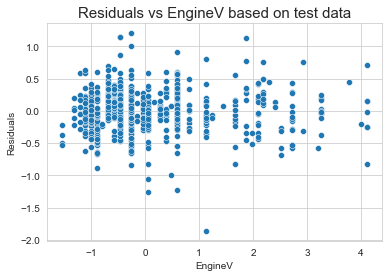

In [93]:
# Plot the scatter plot for Residuals vs EngineV based on test data
sns.scatterplot(x = X_test['EngineV'], y = residuals_test)

plt.title('Residuals vs EngineV based on test data', fontsize = 15)
plt.ylabel('Residuals')
plt.show()

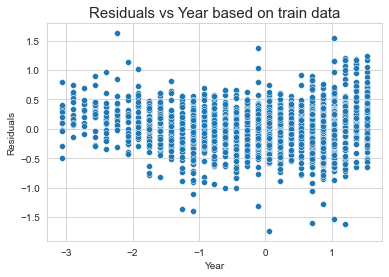

In [94]:
# Plot the scatter plot for Residuals vs Year based on train data
sns.scatterplot(x = X_train['Year'], y = residuals_train)

plt.title('Residuals vs Year based on train data', fontsize = 15)
plt.ylabel('Residuals')
plt.show()

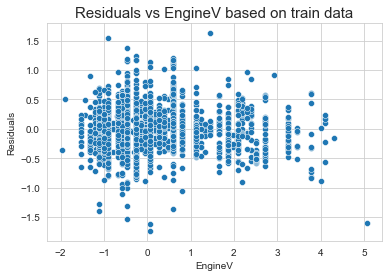

In [95]:
# Plot the scatter plot for Residuals vs EngineV based on train data
sns.scatterplot(x = X_train['EngineV'], y = residuals_train)

plt.title('Residuals vs EngineV based on train data', fontsize = 15)
plt.ylabel('Residuals')
plt.show()

From the above, there is no obvious relationships between the error terms (residuals) and the independent variables.

Perform Durbin-Watson test for autocorrelation check:

In [96]:
# Import durbin_watson from statsmodels
from statsmodels.stats.stattools import durbin_watson

In [97]:
# Perform Durbin-Watson test on test data
durbin_watson(residuals_test)

2.0312811747664115

In [98]:
# Perform Durbin-Watson test on train data
durbin_watson(residuals_train)

1.9811342725437153

From the above Durbin-Watson test, there is no implication of autocorrelation of error terms.

Finding the weights and bias

In [99]:
# Obtain the bias (intercept) of the linear model
linear_model.intercept_

9.118725560673074

In [100]:
# Obtain the weights (coefficients) of the linear model
linear_model.coef_

array([ 0.58375972,  0.20444211,  0.0847227 ,  0.00710813, -0.49223386,
       -0.6545242 , -0.23007335, -0.26458374, -0.35470633, -0.27742046,
       -0.30126021, -0.36479543, -0.47761694, -0.12195715, -0.07369905,
       -0.0992319 ,  0.8930104 ])

In [101]:
# Create a dataframe to report the weights of features properly
linear_model_summary = pd.DataFrame(data = X.columns.values, columns = ['Features'])
linear_model_summary['Weights'] = linear_model.coef_
linear_model_summary

,Features,Weights
0,Year,0.583760
1,EngineV,0.204442
2,Brand_BMW,0.084723
3,Brand_Mercedes-Benz,0.007108
4,Brand_Mitsubishi,-0.492234
5,Brand_Renault,-0.654524
6,Brand_Toyota,-0.230073
7,Brand_Volkswagen,-0.264584
8,Body_hatch,-0.354706
9,Body_other,-0.277420


As mentioned, the following columns have been dropped and they have become the reference point of their respective categorical column:

    Brand_Audi
    Body_crossover
    Engine Type_Diesel
    Registration_no
    
The weights of features reported above can be thought as the relative effects of the features on log_price as compared to their respective reference point.

# Evaluation Metrics for the Linear Model

Import metrics from sklearn:

In [102]:
from sklearn import metrics

Evaluate linear_model based on train data:

In [103]:
# R2 
r2_train = round(linear_model.score(X_train,y_train),2)

# Adjusted R2 
n_train = X_train.shape[0]
k_train = X_train.shape[1]
adj_r2_train = round(1 - (((1 - r2_train) * ( n_train -1 )) / (n_train - k_train - 1)),2)

# MAE
mae_train = round(metrics.mean_absolute_error(y_train,predictions_train),2)

# MSE
mse_train = round(metrics.mean_squared_error(y_train,predictions_train),2)

# RMSE
rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,predictions_train)),2)

print('Model evaluation based on train data:')
print(f'R2 = {r2_train}')
print(f'Adjusted_R2 = {adj_r2_train}')
print(f'MAE = {mae_train}')
print(f'MSE = {mse_train}')
print(f'RMSE = {rmse_train}')

Model evaluation based on train data:
R2 = 0.88
Adjusted_R2 = 0.88
MAE = 0.23
MSE = 0.09
RMSE = 0.31


Evaluate linear_model based on test data:

In [104]:
# R2 
r2_test = round(linear_model.score(X_test,y_test),2)

# Adjusted R2 
n_test = X_test.shape[0]
k_test = X_test.shape[1]
adj_r2_test = round(1 - (((1 - r2_test) * ( n_test -1 )) / (n_test - k_test - 1)),2)

# MAE
mae_test = round(metrics.mean_absolute_error(y_test,predictions_test),2)

# MSE
mse_test = round(metrics.mean_squared_error(y_test,predictions_test),2)

# RMSE
rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,predictions_test)),2)

print('Model evaluation based on test data:')
print(f'R2 = {r2_test}')
print(f'Adjusted_R2 = {adj_r2_test}')
print(f'MAE = {mae_test}')
print(f'MSE = {mse_test}')
print(f'RMSE = {rmse_test}')

Model evaluation based on test data:
R2 = 0.87
Adjusted_R2 = 0.87
MAE = 0.23
MSE = 0.1
RMSE = 0.31


From above we can see the adjusted R2 based on both train and test data are close to each other. For a good model its accuracy should be as high as possible and its performance for both train and test data should be as close as possible. For our case here, the adjusted R2 obtained are quite impressive for a linear regression model. It may still have some rooms for improvement. For now, we will proceed from here.

Recall that we have performed log transformation for the 'Price' column. To obtain back the actual prices, we take the exponential of the log_price.

In [105]:
# Create a dataframe for actual vs predicted in actual prices based on test data
df_actual_pred_test = pd.DataFrame()
df_actual_pred_test['Actual Prices Test'] = np.round(np.exp(y_test), 1)            
df_actual_pred_test['Predicted Prices Test'] = np.round(np.exp(predictions_test), 1)                           
df_actual_pred_test['Residuals'] = df_actual_pred_test['Actual Prices Test'] - df_actual_pred_test['Predicted Prices Test']
df_actual_pred_test.head()

,Actual Prices Test,Predicted Prices Test,Residuals
1745,6800.0,9721.9,-2921.9
3950,111999.0,61702.8,50296.2
922,7800.0,7614.9,185.1
666,15500.0,11837.8,3662.2
3956,6000.0,5259.3,740.7


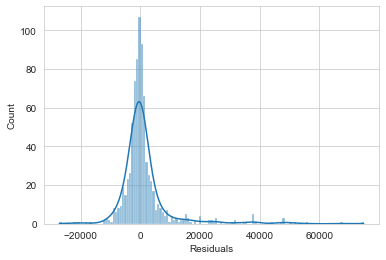

In [106]:
# Plot the histogram for the residuals
sns.histplot(x='Residuals', data = df_actual_pred_test, kde=True)
plt.show()

From above we can see that the residuals generally follow normal distribution, with longer tail on the right.

# Save the linear model and the scaler

Import pickle for saving the linear model and the scaler

In [107]:
import pickle

In [108]:
# To save the model
with open('Cars_Linear_Model','wb') as file:
    pickle.dump(linear_model,file)

In [109]:
# To save the scaler
with open('Cars_Standard_Scaler','wb') as file:
    pickle.dump(scaler,file)

# Model Deployment
We have built a linear model for price prediction of used cars. Now we will proceed to demonstrate a simple deployment of the linear model:

1. Firstly, another .ipynb file (Price Prediction for Used Cars_For Module.ipynb) has been developed. This .ipynb file contains the codes for data preprocessing, making price predictions using the saved 'Cars_Linear_Model' and 'Cars_Standard_Scaler' from above. The purpose of creating this .ipynb file is to subsequently create a .py module file (Price_Prediction_for_Used_Cars_Module.py), which can be used for the model deployment. 

2. Another .ipynb file (Price Prediction for Used Cars_Model Deployment.ipynb) has been provided for model deployment. It demonstrates how to easily make price predictions from a csv file just by using a few very basic lines of codes, while leaving all the data preprocessing, manipulation etc. behind the scene.